Code adapted from https://github.com/patrickcgray/open-geo-tutorial

# Preparing Dataset

In [15]:
from IPython.display import Audio, display
def alert():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

In [16]:
alert()

In [1]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import numpy as np
from shapely.geometry import mapping

In [2]:
import os # we need os to do some basic file operations
import re
regexp = re.compile(r'_B[08][12345678A]')
sentinal_20m = "./Satellite_images/12_band_images/S2A_MSIL2A_20191211T112451_N0213_R037_T29TNF_20191211T124129.SAFE/GRANULE/L2A_T29TNF_A023343_20191211T112448/IMG_DATA/R10m/"
# find every file in the sentinal_fp directory
sentinal_band_paths = [os.path.join(sentinal_20m, f) for f in os.listdir(sentinal_20m) if regexp.search(f) ]
sentinal_band_paths.sort()
sentinal_band_paths

['./Satellite_images/12_band_images/S2A_MSIL2A_20191211T112451_N0213_R037_T29TNF_20191211T124129.SAFE/GRANULE/L2A_T29TNF_A023343_20191211T112448/IMG_DATA/R10m/T29TNF_20191211T112451_B02_10m.jp2',
 './Satellite_images/12_band_images/S2A_MSIL2A_20191211T112451_N0213_R037_T29TNF_20191211T124129.SAFE/GRANULE/L2A_T29TNF_A023343_20191211T112448/IMG_DATA/R10m/T29TNF_20191211T112451_B03_10m.jp2',
 './Satellite_images/12_band_images/S2A_MSIL2A_20191211T112451_N0213_R037_T29TNF_20191211T124129.SAFE/GRANULE/L2A_T29TNF_A023343_20191211T112448/IMG_DATA/R10m/T29TNF_20191211T112451_B04_10m.jp2',
 './Satellite_images/12_band_images/S2A_MSIL2A_20191211T112451_N0213_R037_T29TNF_20191211T124129.SAFE/GRANULE/L2A_T29TNF_A023343_20191211T112448/IMG_DATA/R10m/T29TNF_20191211T112451_B08_10m.jp2']

In [3]:

# create a products directory within the data dir which won't be uploaded to Github
img_dir = './data/'

# check to see if the dir it exists, if not, create it
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

# filepath for image we're writing out
img_fp = img_dir + 'sentinel_bands.tif'
"""
# Read metadata of first file and assume all other bands are the same
with rasterio.open(sentinal_band_paths[0]) as src0:
    meta = src0.meta

# Update metadata to reflect the number of layers
meta.update(count = len(sentinal_band_paths))

# Read each layer and write it to stack
with rasterio.open(img_fp, 'w', **meta) as dst:
    for id, layer in enumerate(sentinal_band_paths, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))
"""

In [4]:
full_dataset = rasterio.open(img_fp)
img_rows, img_cols = full_dataset.shape
img_bands = full_dataset.count
print(full_dataset.shape) # dimensions
print(full_dataset.count) # bands

(10980, 10980)
4


In [5]:
dataset=full_dataset
# what is the name of this image
img_name = dataset.name
print('Image filename: {n}\n'.format(n=img_name))

# How many bands does this image have?
num_bands = dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# Does the raster have a description or metadata?
desc = dataset.descriptions
metadata = dataset.meta

print('Raster description: {desc}\n'.format(desc=desc))

# What driver was used to open the raster?
driver = dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = dataset.crs
print('Image projection:')
print(proj, '\n')

# What is the raster's "geo-transform"
gt = dataset.transform

print('Image geo-transform:\n{gt}\n'.format(gt=gt))

print('All raster metadata:')
print(metadata)
print('\n')

Image filename: ./data/sentinel_bands.tif

Number of bands in image: 4

Image size is: 10980 rows x 10980 columns

Raster description: (None, None, None, None)

Raster driver: JP2OpenJPEG

Image projection:
None 

Image geo-transform:
| 10.00, 0.00, 499980.00|
| 0.00,-10.00, 4600020.00|
| 0.00, 0.00, 1.00|

All raster metadata:
{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 4, 'crs': None, 'transform': Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 4600020.0)}




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 2000, 2000)


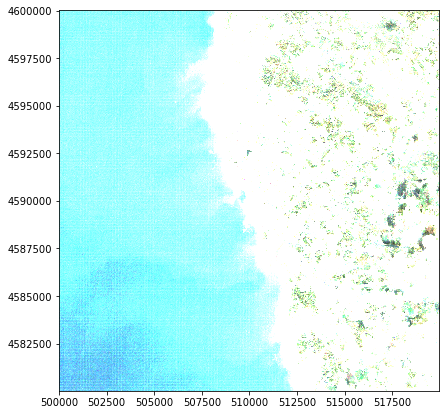

In [6]:
import matplotlib.pyplot as plt
from rasterio.plot import show

clipped_img = full_dataset.read([3,2,1])[:, 1000:3000 , 1000:3000 ]
print(clipped_img.shape)
fig, ax = plt.subplots(figsize=(10,7))
show(clipped_img[:, :, :], ax=ax, transform=full_dataset.transform) # add the transform arg to get it in lat long coords

# Indices

In [7]:
with rasterio.open(img_fp) as src:
    green_band = src.read(2) # band 3
    red_band = src.read(3)   # band 4
    nir_band = src.read(4)   # band 8
    img = src.read()[:, 150:600, 250:1400]
    
ndwi = (green_band.astype(float) - nir_band.astype(float)) / (green_band.astype(float) + nir_band.astype(float))
ndvi = (nir_band.astype(float) - red_band.astype(float)) / (red_band.astype(float) + nir_band.astype(float))


C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [29]:
from rasterio.plot import reshape_as_raster, reshape_as_image
with rasterio.open(img_fp) as src:
    img = src.read()[:, 1000:3000 ,  1000:3000 ]
ndwi_sub = ndwi[ 1000:3000 ,  1000:3000 ]
ndvi_sub = ndvi[ 1000:3000 , 1000:3000 ]
reshaped_img = reshape_as_image(img)

In [10]:
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])
    return colors

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


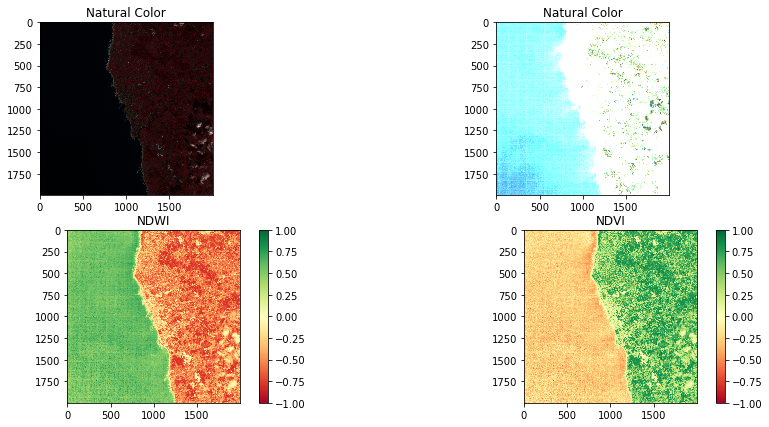

In [33]:
fig, axs = plt.subplots(2,2,figsize=(15,7))

img_stretched = color_stretch(reshaped_img, [3, 2, 1])
axs[0,0].set_title("Natural Color")
axs[0,0].imshow(img_stretched)

axs[0,1].set_title("Natural Color")
axs[0,1].imshow(reshape_as_image(clipped_img))

nwdi_plot = axs[1,0].imshow(ndwi_sub, cmap="RdYlGn")
axs[1,0].set_title("NDWI")
fig.colorbar(nwdi_plot, ax=axs[1,0])

ndvi_plot = axs[1,1].imshow(ndvi_sub, cmap="RdYlGn")
axs[1,1].set_title("NDVI")
fig.colorbar(ndvi_plot, ax=axs[1,1])

plt.show()

# Testing an Unsupervised Classification Algorithm

In [39]:
from sklearn.cluster import KMeans

bands, rows, cols = img.shape
print(img.shape)
print(reshaped_img.shape)

(4, 2000, 2000)
(2000, 2000, 4)


In [40]:
k = 10 # num of clusters

kmeans_predictions = KMeans(n_clusters=k, random_state=0).fit(reshaped_img.reshape(-1, 4))

kmeans_predictions_2d = kmeans_predictions.labels_.reshape(rows, cols)

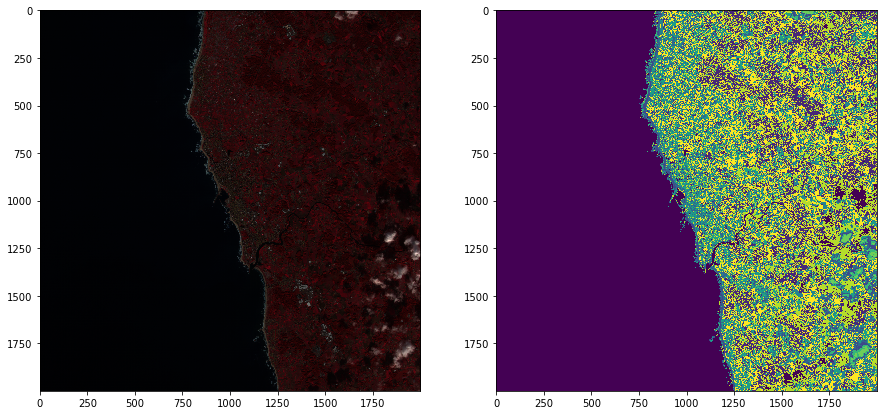

In [41]:
# Now show the classmap next to the image
fig, axs = plt.subplots(1,2,figsize=(15,8))

img_stretched = color_stretch(reshaped_img, [3, 2, 1])
axs[0].imshow(img_stretched)

axs[1].imshow(kmeans_predictions_2d)